In [1]:
# required for jupyter notebook
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)}) # set sns figure size

import os
import math

In [2]:
# read raw csv by marking dropping missing values
missing_values = ['NIL', 'nil', '']
raw_df = pd.read_csv(os.path.join('..', 'Datasets', 'brri-datasets', 'all-station_raw.csv'), 
                     na_values=missing_values)

raw_df.head()

,Station,Year,Month,Day,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day)
0,Barisal,2017,1,1,25.2,13.8,0.0,1.0,94.0,62.0,6.3,4.5,277.72
1,Barisal,2017,1,2,25.4,13.8,0.0,1.0,94.0,62.0,5.5,5.3,257.52
2,Barisal,2017,1,3,25.6,13.4,0.0,1.0,94.0,61.0,6.2,4.6,275.2
3,Barisal,2017,1,4,25.4,14.0,0.0,1.0,94.0,64.0,6.3,4.5,277.72
4,Barisal,2017,1,5,23.0,13.0,0.0,1.0,94.0,68.0,4.0,6.8,219.63


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Station                           4954 non-null   object 
 1   Year                              4954 non-null   int64  
 2   Month                             4954 non-null   int64  
 3   Day                               4954 non-null   int64  
 4   Max Temp. (degree Celcius)        4948 non-null   float64
 5   Min Temp. (degree Celcius)        4948 non-null   float64
 6   Rainfall (mm)                     4820 non-null   float64
 7   Actual Evaporation (mm)           4436 non-null   float64
 8   Relative Humidity (morning, %)    4950 non-null   float64
 9   Relative Humidity (afternoon, %)  4918 non-null   float64
 10  Sunshine (hour/day)               4939 non-null   float64
 11  Cloudy (hour/day)                 4767 non-null   float64
 12  Solar 

In [4]:
# read Gazipur raw csv by marking dropping missing values
gazipur_raw_df = pd.read_csv(os.path.join('..', 'Datasets', 'brri-datasets', 'gazipur_2016-2020', 'gazipur.csv'), 
                     na_values=missing_values)

gazipur_raw_df.head()

,Station,Year,Month,Day,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,Gazipur,2016,1,1,27.2,14.2,0.0,1.0,89.0,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2016,1,2,27.6,13.0,0.0,2.0,71.0,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2016,1,3,25.7,12.8,0.0,2.0,89.0,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2016,1,4,26.8,14.0,0.0,2.0,84.0,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2016,1,5,26.4,14.8,0.0,2.0,78.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# read Rangpur raw csv by marking dropping missing values
rangpur_raw_df = pd.read_csv(os.path.join('..', 'Datasets', 'brri-datasets', 'rangpur_mid2017-2020', 'rangpur.csv'), 
                     na_values=missing_values)

rangpur_raw_df.head()

,Station,Year,Month,Day,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day)
0,Rangpur,2017,7,1,33.5,25.3,49.0,2.0,95.0,96,0.0,13.5,188.60
1,NaN,2017,7,2,27.5,25.2,37.6,3.0,91.0,84,6.0,7.5,381.39
2,NaN,2017,7,3,30.6,26.8,0.0,3.0,83.0,80,2.3,11.2,262.50
3,NaN,2017,7,4,30.8,26.2,32.3,3.0,96.0,87,0.0,13.5,188.60
4,NaN,2017,7,5,28.8,26.4,0.0,3.0,87.0,80,3.3,10.2,294.63


In [6]:
# read Barisal raw csv by marking dropping missing values
barisal_raw_df = pd.read_csv(os.path.join('..', 'Datasets', 'brri-datasets', 'barisal_2017-2020', 'barisal.csv'), 
                     na_values=missing_values)

barisal_raw_df.head()

,Station,Year,Month,Day,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day)
0,Barisal,2017,1,1,25.2,13.8,0.0,1.0,94,62.0,6.3,4.5,277.72
1,NaN,2017,1,2,25.4,13.8,0.0,1.0,94,62.0,5.5,5.3,257.52
2,NaN,2017,1,3,25.6,13.4,0.0,1.0,94,61.0,6.2,4.6,275.2
3,NaN,2017,1,4,25.4,14.0,0.0,1.0,94,64.0,6.3,4.5,277.72
4,NaN,2017,1,5,23.0,13.0,0.0,1.0,94,68.0,4.0,6.8,219.63


In [7]:
# read Habiganj raw csv by marking dropping missing values
habiganj_raw_df = pd.read_csv(os.path.join('..', 'Datasets', 'brri-datasets', 'habiganj_2019-2020', 'habiganj.csv'), 
                     na_values=missing_values)

habiganj_raw_df.head()

,Station,Year,Month,Day,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day),Unnamed: 13,Unnamed: 14
0,Habiganj,2019,1,1,27.8,12.8,0.0,NaN,84,72,8.8,1.9,331.38,NaN,NaN
1,NaN,2019,1,2,27.1,13.2,0.0,NaN,89,74,7.8,2.9,306.74,NaN,NaN
2,NaN,2019,1,3,27.2,13.5,0.0,NaN,94,59,8.5,2.2,323.98,NaN,NaN
3,NaN,2019,1,4,26.2,15.5,0.0,NaN,89,70,8.4,2.3,321.52,NaN,NaN
4,NaN,2019,1,5,20.5,12.8,0.0,NaN,84,58,8.7,2.0,328.91,NaN,NaN


In [8]:
def get_val_freq_map(df, column):
    '''
    get map of value counts of a dataframe for a particular column
    '''
    mp = {}
    for val in raw_df[column]:
        if val in mp:
            mp[val]+=1
        else:
            mp[val]=1
    return mp

# Analyze all station Rainfall data

In [9]:
rainfall_column = 'Rainfall (mm)'

In [10]:
rainfall_df = raw_df[[rainfall_column]].copy()
rainfall_df.head()

,Rainfall (mm)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [11]:
rainfall_df.value_counts()

Rainfall (mm)
0.0              3280
2.0                46
1.0                36
1.2                34
0.6                32
                 ... 
39.2                1
39.6                1
39.8                1
40.2                1
265.0               1
Length: 391, dtype: int64

In [12]:
print(rainfall_df.max())

Rainfall (mm)    265.0
dtype: float64


<AxesSubplot:>

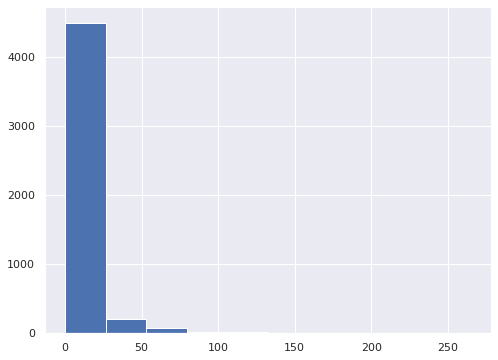

In [13]:
rainfall_df[rainfall_column].hist(bins=10)

In [14]:
def group_column_vals(df, column, diff=10):
    group_labels = []
    group_freqs = []

    length = math.ceil(df[column].max()/diff)

    for i in range(length+1):
        group_freqs.append(0)
        if i==0:
            group_labels.append('0')
        else:
            group_labels.append(str(1+(i-1)*diff) + '-' + str(i*diff))

    for val in df[column]:
        if math.isnan(val):
            continue
        group_freqs[math.ceil(val/diff)]+=1
    
    mp = {}
    total_freq = sum(group_freqs)
    for i in range(length+1):
        # store percantage of each group
        mp[group_labels[i]] = round((group_freqs[i]/total_freq) * 100, 2) 
        
    return mp

In [15]:
group_column_vals(df=rainfall_df, column=rainfall_column, diff=20)

{'0': 68.05,
 '1-20': 22.76,
 '21-40': 5.48,
 '41-60': 1.8,
 '61-80': 1.0,
 '81-100': 0.44,
 '101-120': 0.25,
 '121-140': 0.1,
 '141-160': 0.06,
 '161-180': 0.02,
 '181-200': 0.02,
 '201-220': 0.0,
 '221-240': 0.0,
 '241-260': 0.0,
 '261-280': 0.02}

## Analyze Staion-wise Rainfall

### Gazipur

In [16]:
gazipur_rainfall_df = gazipur_raw_df[[rainfall_column]].copy()
gazipur_rainfall_df.head()

,Rainfall (mm)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


<AxesSubplot:>

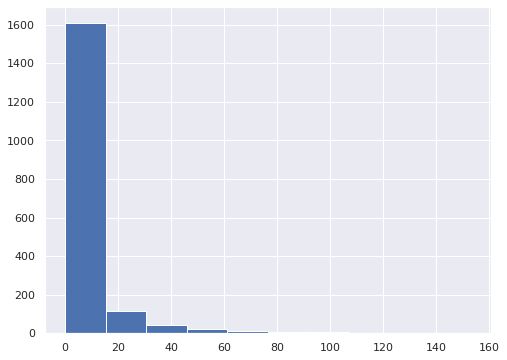

In [17]:
gazipur_rainfall_df[rainfall_column].hist(bins=10)

In [18]:
group_column_vals(gazipur_rainfall_df, rainfall_column, 20)

{'0': 66.23,
 '1-20': 25.32,
 '21-40': 5.22,
 '41-60': 1.81,
 '61-80': 0.71,
 '81-100': 0.38,
 '101-120': 0.16,
 '121-140': 0.11,
 '141-160': 0.05}

### Rangpur

In [19]:
rangpur_rainfall_df = rangpur_raw_df[[rainfall_column]].copy()
rangpur_rainfall_df.head()

,Rainfall (mm)
0,49.0
1,37.6
2,0.0
3,32.3
4,0.0


<AxesSubplot:>

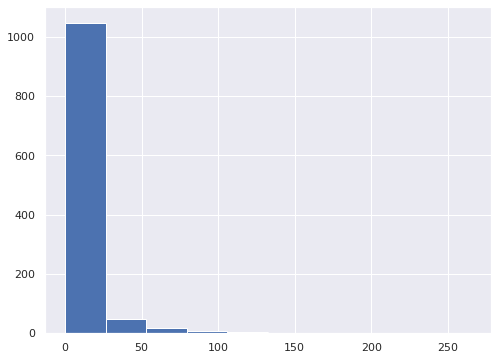

In [20]:
rangpur_rainfall_df[rainfall_column].hist(bins=10)

In [21]:
group_column_vals(rangpur_rainfall_df, rainfall_column, 20)

{'0': 71.52,
 '1-20': 17.92,
 '21-40': 6.21,
 '41-60': 1.95,
 '61-80': 1.24,
 '81-100': 0.62,
 '101-120': 0.27,
 '121-140': 0.09,
 '141-160': 0.09,
 '161-180': 0.0,
 '181-200': 0.0,
 '201-220': 0.0,
 '221-240': 0.0,
 '241-260': 0.0,
 '261-280': 0.09}

### Barisal

In [22]:
barisal_rainfall_df = barisal_raw_df[[rainfall_column]].copy()
barisal_rainfall_df.head()

,Rainfall (mm)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


<AxesSubplot:>

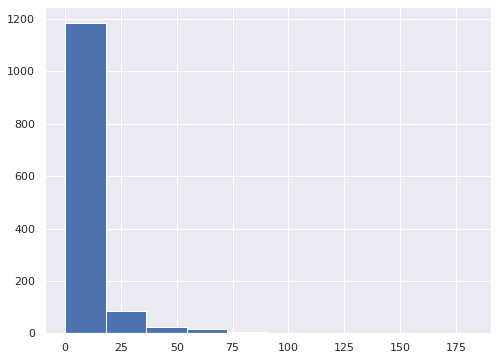

In [23]:
barisal_rainfall_df[rainfall_column].hist(bins=10)

In [24]:
group_column_vals(barisal_rainfall_df, rainfall_column, 20)

{'0': 64.45,
 '1-20': 26.49,
 '21-40': 5.66,
 '41-60': 1.74,
 '61-80': 0.91,
 '81-100': 0.3,
 '101-120': 0.23,
 '121-140': 0.08,
 '141-160': 0.08,
 '161-180': 0.0,
 '181-200': 0.08}

### Habiganj

In [25]:
habiganj_rainfall_df = habiganj_raw_df[[rainfall_column]].copy()
habiganj_rainfall_df.head()

,Rainfall (mm)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


<AxesSubplot:>

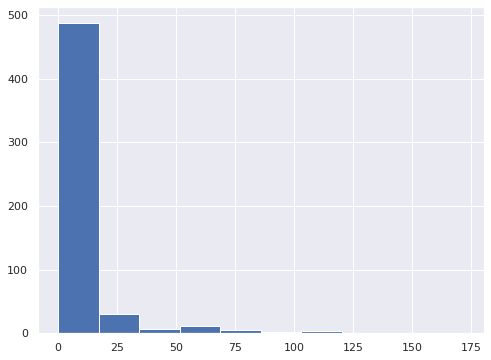

In [26]:
habiganj_rainfall_df[rainfall_column].hist(bins=10)

In [27]:
group_column_vals(habiganj_rainfall_df, rainfall_column, 20)

{'0': 75.69,
 '1-20': 15.17,
 '21-40': 4.39,
 '41-60': 1.65,
 '61-80': 1.65,
 '81-100': 0.55,
 '101-120': 0.55,
 '121-140': 0.18,
 '141-160': 0.0,
 '161-180': 0.18}

# Correlation Heatmap

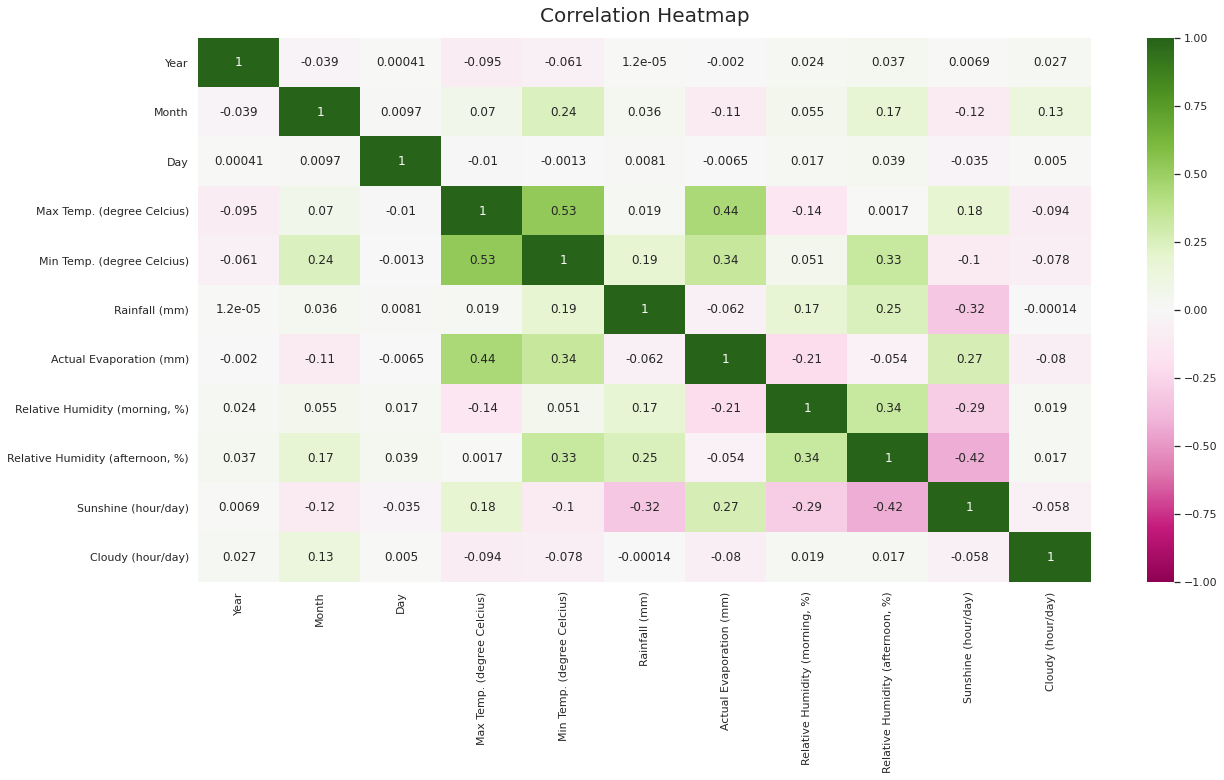

In [28]:
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(20, 10))

corr_matrix = raw_df.corr()

# mask to hide the upper triangle of the symmetric corr-matrix
# mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

heatmap = sns.heatmap(
            
    # correlation matrix
    corr_matrix,

    # mask the top triangle of the matrix
    # mask=mask,
    
    # two-contrast color, different color for + -
    cmap="PiYG",
    
    # color map range
    vmin=-1, vmax=1,
    
    # show corr values in the cells
    annot=True
)

# set a title
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=16);

plt.show()

# Scatter plots

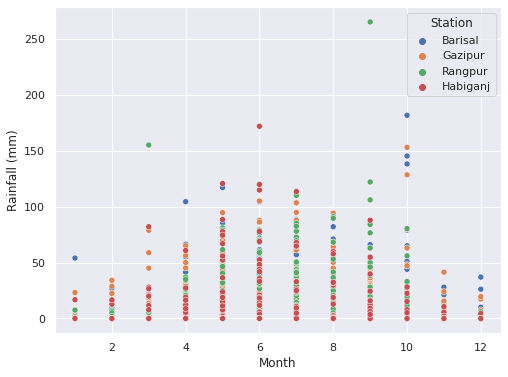

In [34]:
_=sns.scatterplot(data=raw_df, x='Month', y=rainfall_column, hue='Station')

In [31]:
# sns.pairplot(raw_df[['Rainfall (mm)', 'Month', 'Station']], hue = 'Station', height = 5)